# Regressão Linear

Regressão linear com base no curso Machine Learning Coursera Andrew Ng

### Modelo

A função custo é dada por:

$$J(\theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

E a hipótese (modelo linear) :

$$ h_{\theta}(x^{(i)}) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}$$

Aos familiarizados com regressão, estarão mais acostumados com esta outra notação:

$$ h_{\theta}(x^{(i)}) = \alpha + \beta x_{1} = \beta_{0} + \beta_{1}x_{1} $$

### Otimização

#### Batch gradient descent

$ \theta_{j} := \theta_{j} - \alpha  \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_{j}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# import plotly

Definindo as funções que irei utilizar

In [3]:
def computeCost(X, y, theta):
    h = np.dot(X, theta)  # hipotese
    J = sum((1/(2*m))*((h-y)**2))  # funcao custo
    return J

def gradientDescent(X, y, theta, alpha, n_iter):
    J_hist = []
    X_t = X.transpose()
    m = len(y)
    i = 0
    while i < n_iter:
        
        h = np.dot(X, theta) - y
        theta = theta - alpha*((1/m)*np.dot(X_t, h))
        
        J_hist.append(computeCost(X, y, theta))
        
        i += 1
    return theta, J_hist

### Plot dos dados

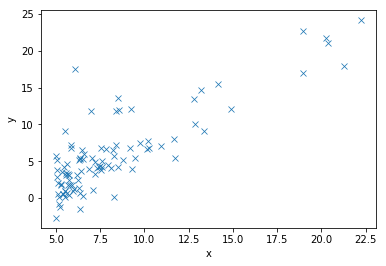

In [13]:
df = pd.read_csv("ex1data1.txt", header = None, names = ["x", "y"])
sns.scatterplot(x = "x", y = "y", data=df, marker = "x")

Transformando os dados em numpy para facilitar as contas

In [18]:
X = df["x"].to_numpy()
y = df["y"].to_numpy()
# quantidade de variaveis
m = len(y)
# X com bias (vetor com 1)
X = np.array([np.ones(m), X]).transpose()

Calculando o custo inicial, que depende do theta (chute) inicial

In [6]:
theta = np.array([0, 0])
display(computeCost(X, y, theta))
theta = np.array([-1, 2])
display(computeCost(X, y, theta))

32.072733877455676

54.24245508201239

Rodando o modelo 

In [7]:
theta = np.array([0, 0])
n_iter = 1500
alpha = 0.01
theta_new, cost_history = gradientDescent(X, y, theta, alpha, n_iter)

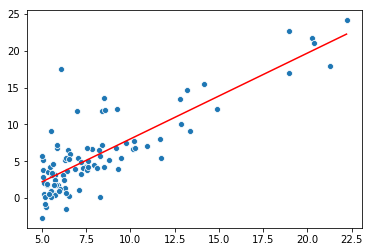

In [8]:
sns.scatterplot(X[:, 1], y)
sns.lineplot(X[:, 1], np.dot(X,theta_new), color='red')

Veja que está basicamente identico ao modelo de regressão disponibilizado pelo pacote seaborn.

/home/taryll/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


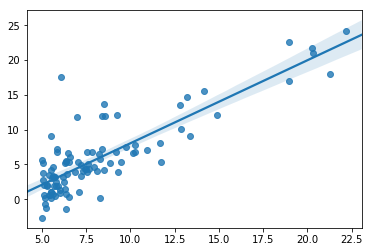

In [9]:
sns.regplot(X[:, 1], y)

Olhe a curva da função custo, a cada iteração, o seu custo vai diminuindo

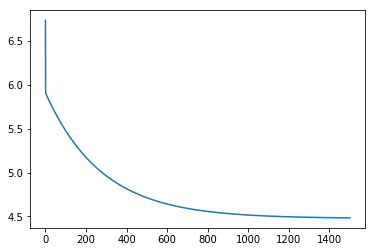

In [10]:
plt.plot(np.linspace(0,n_iter, n_iter), cost_history)

Aqui vamos tentar olhar a curva de nível dos $\theta$

In [11]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = computeCost(X, y, t)
# por causa do plot_surf e contour usarem como entrada valores preprocessados por np.meshgrid
# precisamos usar a transposta para nao plotar errado
J_vals = J_vals.T

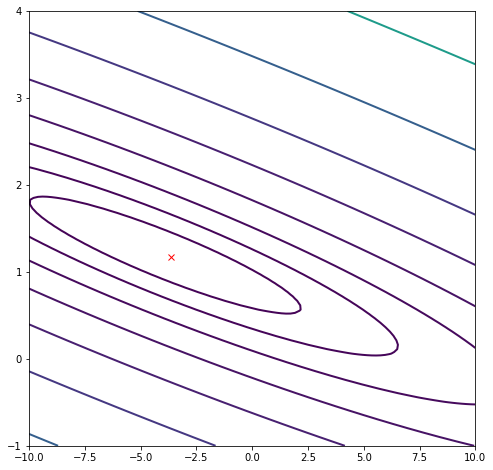

In [12]:
plt.figure(figsize=(8,8))
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'rx')

O segundo exemplo é de predição para valores da casa

In [25]:
df = pd.read_csv("ex1data2.txt", header = None, names = ["size", "n_bedroom", "price"])
df.sample(5)

,size,n_bedroom,price
34,1811,4,285900
27,2526,3,469000
42,2567,4,314000
10,1940,4,239999
16,1320,2,299900


### Feature normalization

In [26]:
df_norm = df.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [45]:
X = df_norm[["size", "n_bedroom"]].to_numpy()
y = df_norm["price"].to_numpy()
# quantidade de variaveis
m = len(y)
# X com bias (vetor com 1)
X = np.append(np.ones(m).reshape(-1, 1), X, axis=1)

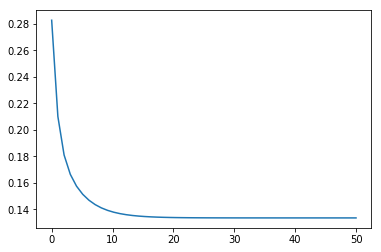

In [71]:
theta = np.array([0, 0, 0])
n_iter = 50
alpha = 0.3
theta_new, cost_history = gradientDescent(X, y, theta, alpha, n_iter)
plt.plot(np.linspace(0,n_iter, n_iter), cost_history)

In [72]:
theta_new

array([-6.51960755e-17,  8.84370724e-01, -5.27835555e-02])

In [75]:
x = np.array([1, 1650, 3])
np.dot(x.transpose(), theta_new)

1459.0533434694642

### Normal equation

$$ (X^{T}X)^{-1}X^{T}y $$

In [74]:
theta_normal_eq = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)
np.dot(x.transpose(), theta_new)

1459.0533434694642